# Import necessary packages

In [1]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn
pip install statistics



SyntaxError: invalid syntax (3924511995.py, line 1)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



ModuleNotFoundError: No module named 'sklearn'

# Load data from CSV file

In [3]:
df = pd.read_csv("car_Prices.csv")

In [4]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


# 1. Data cleaning and transformation

In [5]:
# Number of unique values for each column

df.nunique()

Brand                   76
Year                    45
Model                  781
Car/Suv                618
Title                 8804
UsedOrNew                3
Transmission             3
Engine                 106
DriveType                5
FuelType                 9
FuelConsumption        157
Kilometres           14262
ColourExtInt           834
Location               618
CylindersinEngine       11
BodyType                10
Doors                   13
Seats                   13
Price                 3794
dtype: int64

In [6]:
# Check datatypes 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [7]:
# null values investigation

df.isna().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [8]:
# Obtain a row where 'Year' column == NaN

# No data was inputted. Thus, the row will be deleted.
df.loc[df['Year'].isna()]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Delete the row

df.drop(2391, axis=0, inplace=True)

In [10]:
# Convert 'Year' column from float to int

df['Year'] = df['Year'].astype(int)

In [11]:
# When I tried to convert datatypes for columns 'Kilometres' and 'Price' into int, an error was displayed that some str cannot 
# be converted to int. Upon investigation, there were values '-' and '- / -' in 'Kilometres' column. Thus, those rows will 
# be deleted.

df = df.drop(df[df['Kilometres'] == '-'].index)
df = df.drop(df[df['Kilometres'] == '- / -'].index)

In [13]:
# Delete rows where Price == 'POA'

df = df.drop(df[df['Price'] == 'POA'].index)

In [14]:
df.loc[df['Price'].isna()]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
10156,Isuzu,2016,D-MAX,Ute / Tray,2016 Isuzu D-MAX LS-U HI-Ride (4X4),USED,Automatic,"4 cyl, 3 L",4WD,Diesel,8.1 L / 100 km,147648,Silver / Black,"Hoppers Crossing, VIC",4 cyl,Ute / Tray,2 Doors,4 Seats,NaN
11039,Nissan,2018,Pathfinder,City Jeep - Pre Owned,2018 Nissan Pathfinder Ti X-tronic 2WD,USED,Automatic,-,Front,Unleaded,-,52414,White / Black,"Southbank, VIC",-,Wagon,NaN,NaN,NaN


In [16]:
# Delete rows where Price == 'NaN'

df.drop([10156, 11039], axis=0, inplace=True)

KeyError: '[10156, 11039] not found in axis'

In [32]:
# Verify change

df.isna().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                 3
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption      1652
Kilometres              0
ColourExtInt            0
Location                0
CylindersinEngine    1629
BodyType              268
Doors                1629
Seats                1652
Price                   0
Car_Age                 0
dtype: int64

In [33]:
# Now convert 'Kilometres' and 'Price' columns to int

df['Kilometres'] = pd.to_numeric(df['Kilometres'])
df['Price'] = pd.to_numeric(df['Price'])

df['Kilometres'] = df['Kilometres'].astype(int)
df['Price'] = df['Price'].astype(int)

In [34]:
# Drop columns that we don't need

df = df.drop(['Title','Car/Suv','Engine','ColourExtInt'], axis=1)

In [35]:
# Split 'Location' column by ',' and obtain 'State' column

df[['City','State']] = df['Location'].str.split(',', expand=True)

In [36]:
# Drop 'Location' and 'City' columns
df = df.drop(['Location','City'],axis=1)

In [17]:
# Introducing a new column 'Age' to know the age of the car

from datetime import date
date.today().year
df['Car_Age']=date.today().year-df['Year']
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Car_Age
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990,2
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990,2
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988,2
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990,13
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990,2


In [18]:
# Helper function to extract numbers from string columns

def extract_number(data: 'pd.DataFrame', 
                  col: 'str', 
                  pattern: 'str') -> 'pd.Series':
    '''
    Extracts a number using the given regex pattern from the given data and col, 
    converts the result to float, and returns the result as a pd.Series.
    '''
    return data[col].str.extract(pattern, expand=False).astype('float32')

In [19]:
# Sse the previous hepler function to extract numbers from string columns

df['FuelConsumption'] = extract_number(df, col='FuelConsumption', pattern=r'(\d+\.?\d*) L.*')
df['CylindersinEngine'] = extract_number(df, col='CylindersinEngine', pattern=r'(\d+) (?:cyl|L)')
df['Doors'] = extract_number(df, col='Doors', pattern=r'(\d+) Doors')
df['Seats'] = extract_number(df, col='Seats', pattern=r'(\d+) Seats')

df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Car_Age
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7,5595,White / Black,"Caringbah, NSW",4.0,SUV,4.0,7.0,51990,2
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7,16,Black / Black,"Brookvale, NSW",4.0,Hatchback,5.0,5.0,19990,2
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6,8472,Grey / White,"Sylvania, NSW",4.0,Coupe,2.0,4.0,108988,2
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11.0,136517,White / Brown,"Mount Druitt, NSW",8.0,Coupe,2.0,4.0,32990,13
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6.0,1035,Grey / Black,"Castle Hill, NSW",4.0,SUV,4.0,5.0,34990,2


# 2. Understand distribution for Kilometres and Price columns & Detect outliers

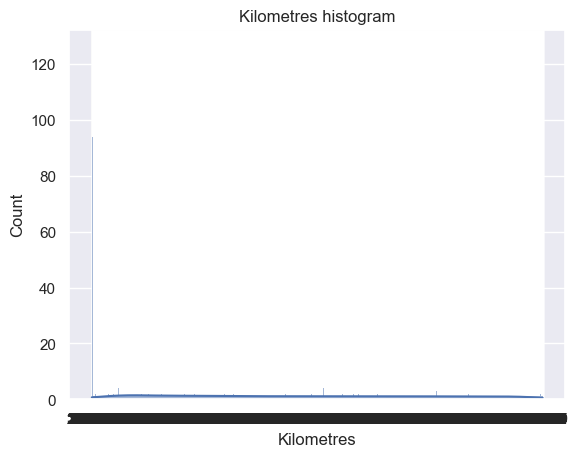

In [20]:
sns.set(style="darkgrid")

sns.histplot(data=df, x='Kilometres', kde=True)
plt.title('Kilometres histogram')
plt.show()

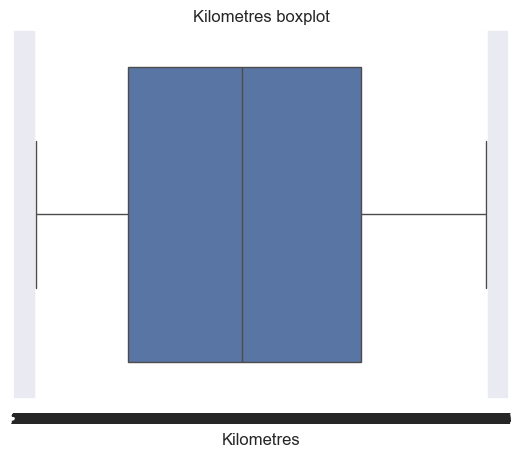

In [21]:
sns.boxplot(x=df['Kilometres'])
plt.title("Kilometres boxplot")
plt.show()

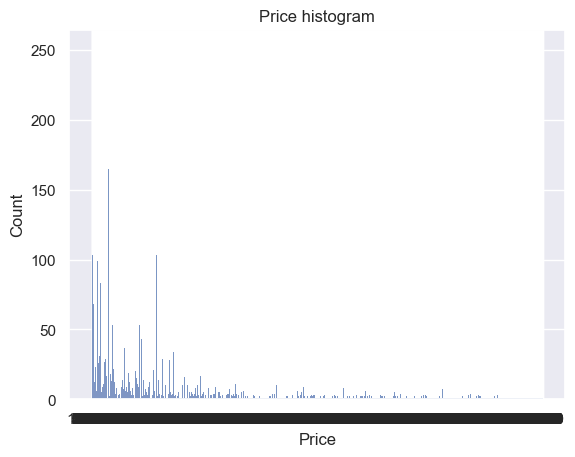

In [22]:
sns.set(style="darkgrid")

sns.histplot(data=df, x='Price', bins=100)
plt.title('Price histogram')
plt.show()

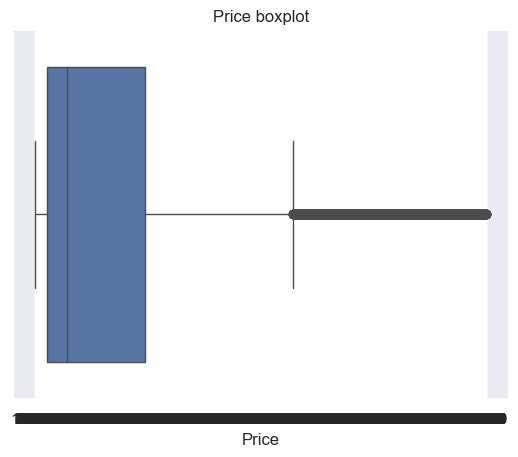

In [23]:
sns.boxplot(x=df['Price'])
plt.title("Price boxplot")
plt.show()

## Removing outliers (Inter Quartile Range (IQR) approach)

### Kilometres column

In [37]:
Q1 = df['Kilometres'].quantile(0.25)
Q3 = df['Kilometres'].quantile(0.75)
IQR = Q3 - Q1

print("25th quartile: ", Q1)
print("75th quartile: ", Q3)
print(IQR)

25th quartile:  41002.5
75th quartile:  146726.75
105724.25


In [38]:
upper = Q3+1.5*IQR
print("Upper Bound:", upper)

lower = Q1-1.5*IQR
print("Lower Bound:", lower)

Upper Bound: 305313.125
Lower Bound: -117583.875


I think one can make a judgement call here with respect to choosing a number for an upper bound. IQR approach has given us
an upper bound of 305,000 kilometers. 

In [39]:
# A total of 265 records are outside the upper bound

df[df['Kilometres'] >= upper]

,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,Car_Age,State
175,Ford,2008,Transit,USED,Manual,Rear,Diesel,9.5,305593,4.0,Commercial,2.0,3.0,9995,16,NSW
237,Toyota,2013,Hilux,USED,Manual,Rear,Diesel,8.1,345194,4.0,Ute / Tray,4.0,5.0,12990,11,NSW
380,Isuzu,2016,D-MAX,USED,Automatic,4WD,Diesel,8.1,310215,4.0,Ute / Tray,2.0,4.0,21990,8,NSW
411,Toyota,2007,Land,USED,Automatic,Other,Unleaded,NaN,310000,NaN,Wagon,NaN,NaN,16990,17,NSW
485,Mazda,2000,E2000,USED,Manual,Rear,Unleaded,11.5,369953,4.0,Commercial,2.0,3.0,5990,24,QLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16087,Holden,2005,Rodeo,USED,Manual,Rear,Unleaded,0.0,353047,6.0,Ute / Tray,2.0,2.0,9990,19,NSW
16241,Toyota,1998,RAV4,USED,Automatic,4WD,Unleaded,9.5,308344,4.0,SUV,2.0,4.0,8999,26,VIC
16345,Mitsubishi,2004,Pajero,USED,Automatic,Other,Diesel,NaN,421021,NaN,Wagon,NaN,NaN,8899,20,VIC
16524,Holden,2012,Colorado,USED,Automatic,Rear,Diesel,9.0,308083,4.0,Ute / Tray,4.0,5.0,13999,12,VIC


In [40]:
# New dataframe with outliers omitted

df2 = df[df['Kilometres'] < upper]

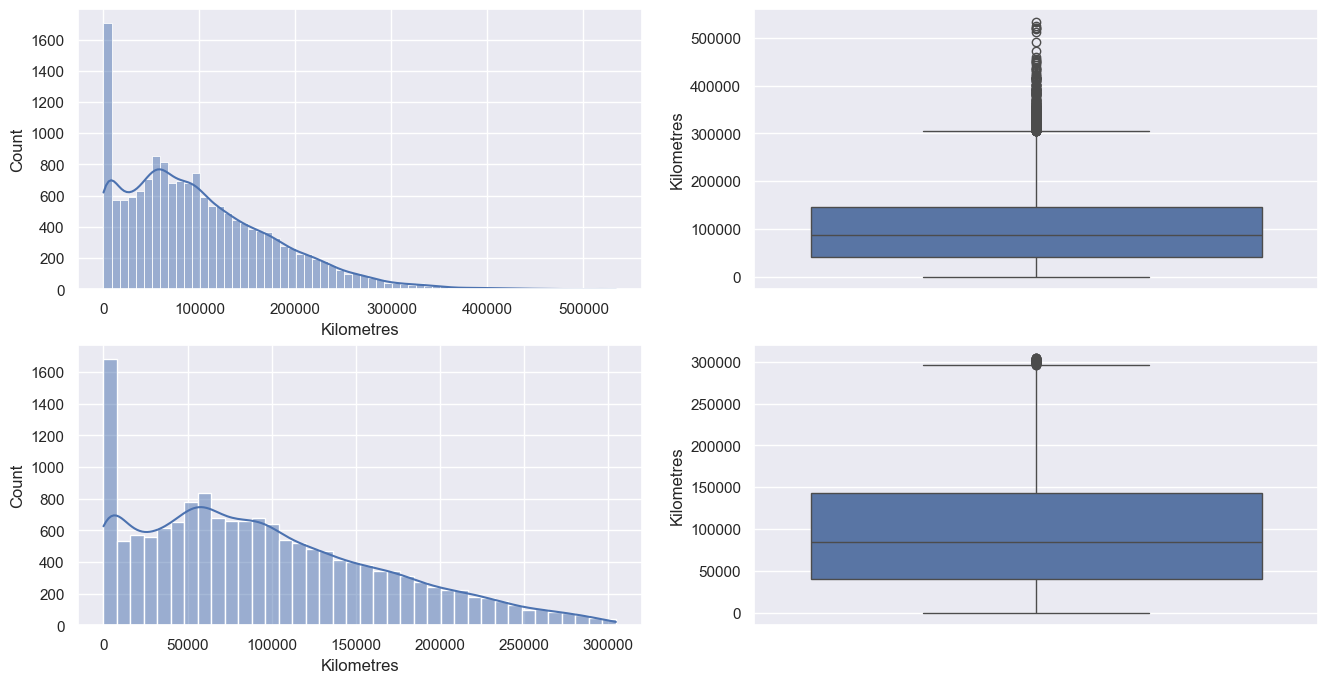

In [41]:
# Comparing before and after outlier removal

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Kilometres'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = df['Kilometres'])

plt.subplot(2,2,3)
sns.histplot(df2['Kilometres'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = df2['Kilometres'])

plt.show()

### Price column

In [42]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

print("25th quartile: ", Q1)
print("75th quartile: ", Q3)
print(IQR)

25th quartile:  18990.0
75th quartile:  42499.0
23509.0


In [43]:
upper = Q3+1.5*IQR
print("Upper Bound:", upper)

lower = Q1-1.5*IQR
print("Lower Bound:", lower)

Upper Bound: 77762.5
Lower Bound: -16273.5


In [44]:
# New dataframe with outliers omitted

df2 = df2[df2['Price'] < upper]

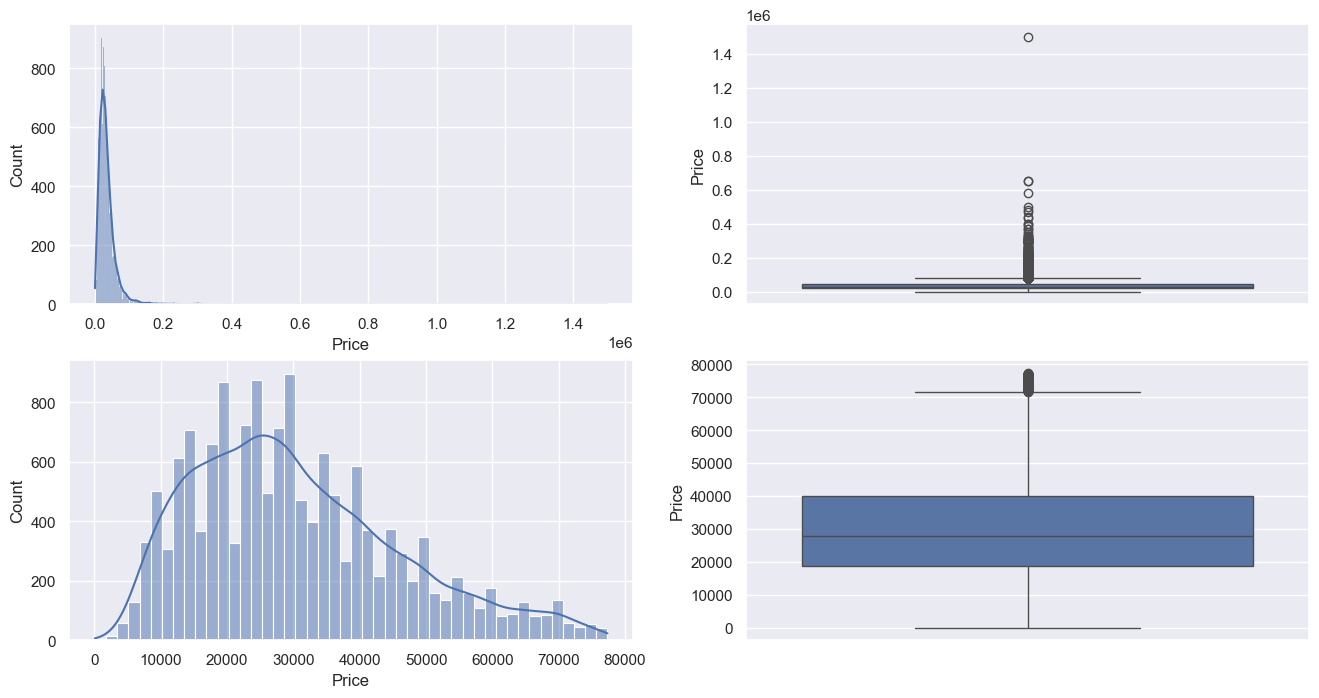

In [45]:
# Comparing before and after outlier removal

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Price'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = df['Price'])

plt.subplot(2,2,3)
sns.histplot(df2['Price'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = df2['Price'])

plt.show()

In [46]:
df.shape

(16106, 16)

In [47]:
# A total of 1131 records were removed

df2.shape

(14975, 16)

In [48]:
# Checking number of null values for each column

df2.isna().sum()

Brand                   0
Year                    0
Model                   0
UsedOrNew               0
Transmission            0
DriveType               0
FuelType                0
FuelConsumption      1493
Kilometres              0
CylindersinEngine    1471
BodyType              250
Doors                1471
Seats                1493
Price                   0
Car_Age                 0
State                   0
dtype: int64

In [49]:
df2.FuelConsumption.unique()

array([ 8.7,  6.7, 11. ,  6. ,  nan,  5.1,  8. ,  7.1,  4.5,  9.8,  6.2,
        5.6,  5.4,  7.5,  6.1,  5.8,  8.4,  4.7,  7.9,  8.2,  6.9,  6.6,
        8.1,  4.2,  7.7,  9.1,  0. ,  7.4,  7.6,  7.8,  9.9, 10.9,  9.6,
       10. ,  8.8,  6.4,  8.9,  9. ,  6.3, 10.4,  7.2,  5.5, 14.5,  5.9,
        9.3, 11.5,  9.2,  4.8,  7.3, 10.1,  8.3,  6.5,  8.6,  5.2,  4.9,
        8.5, 10.5, 12.2,  7. ,  9.5, 16. ,  9.4,  6.8,  4.6, 11.6,  5.3,
        9.7, 10.6, 11.8, 10.2, 10.3,  3.3,  5.7, 10.8, 10.7, 11.3, 14.6,
       13. ,  4.1,  3.6, 12.1, 17.2, 12.3, 12.7, 13.6, 12.8, 13.2, 15.1,
        3.9,  5. , 11.7, 16.4, 13.7, 12.6, 11.2,  4.4, 11.1, 12.4,  4. ,
       12. ,  3.8,  1.9, 11.4, 13.5, 27. , 13.4, 11.9, 14.9,  1.7, 12.5,
       17. , 12.9, 13.9,  4.3, 15. , 14. , 14.2, 13.1, 15.2, 15.7,  3.5,
       14.8, 13.8, 18.6, 16.2, 15.5, 18.1,  2.4, 19.1, 17.1, 17.4, 16.9,
       14.1,  3.7,  2.5, 14.4,  3.4, 14.7, 17.8], dtype=float32)

In [50]:
df2.CylindersinEngine.unique()

array([ 4.,  8., nan,  3.,  6.,  5.,  0.,  2., 12., 10.], dtype=float32)

In [51]:
df2.BodyType.unique()

array(['SUV', 'Hatchback', 'Coupe', 'Commercial', nan, 'Wagon', 'Sedan',
       'Ute / Tray', 'People Mover', 'Convertible', 'Other'], dtype=object)

In [52]:
df2.Doors.unique()

array([ 4.,  5.,  2., nan,  3.], dtype=float32)

In [53]:
df2.Seats.unique()

array([ 7.,  5.,  4., nan,  2.,  3., 14.,  8.,  6.,  9., 11., 12.],
      dtype=float32)

In [54]:
# 1493 records were removed

df2.dropna(inplace=True)

In [55]:
df2 = df2.drop(df2[df2['Transmission'] == '-'].index)

In [56]:
df2 = df2.drop(df2[df2['FuelType'] == '-'].index)

In [57]:
# Note: These are duplicates occuring after removal of certain columns like the ColorExtInt. These aren't duplicates at the 
#       original dataframe. 

df2.drop_duplicates(keep=False, inplace=True) 

# 3. Visualization

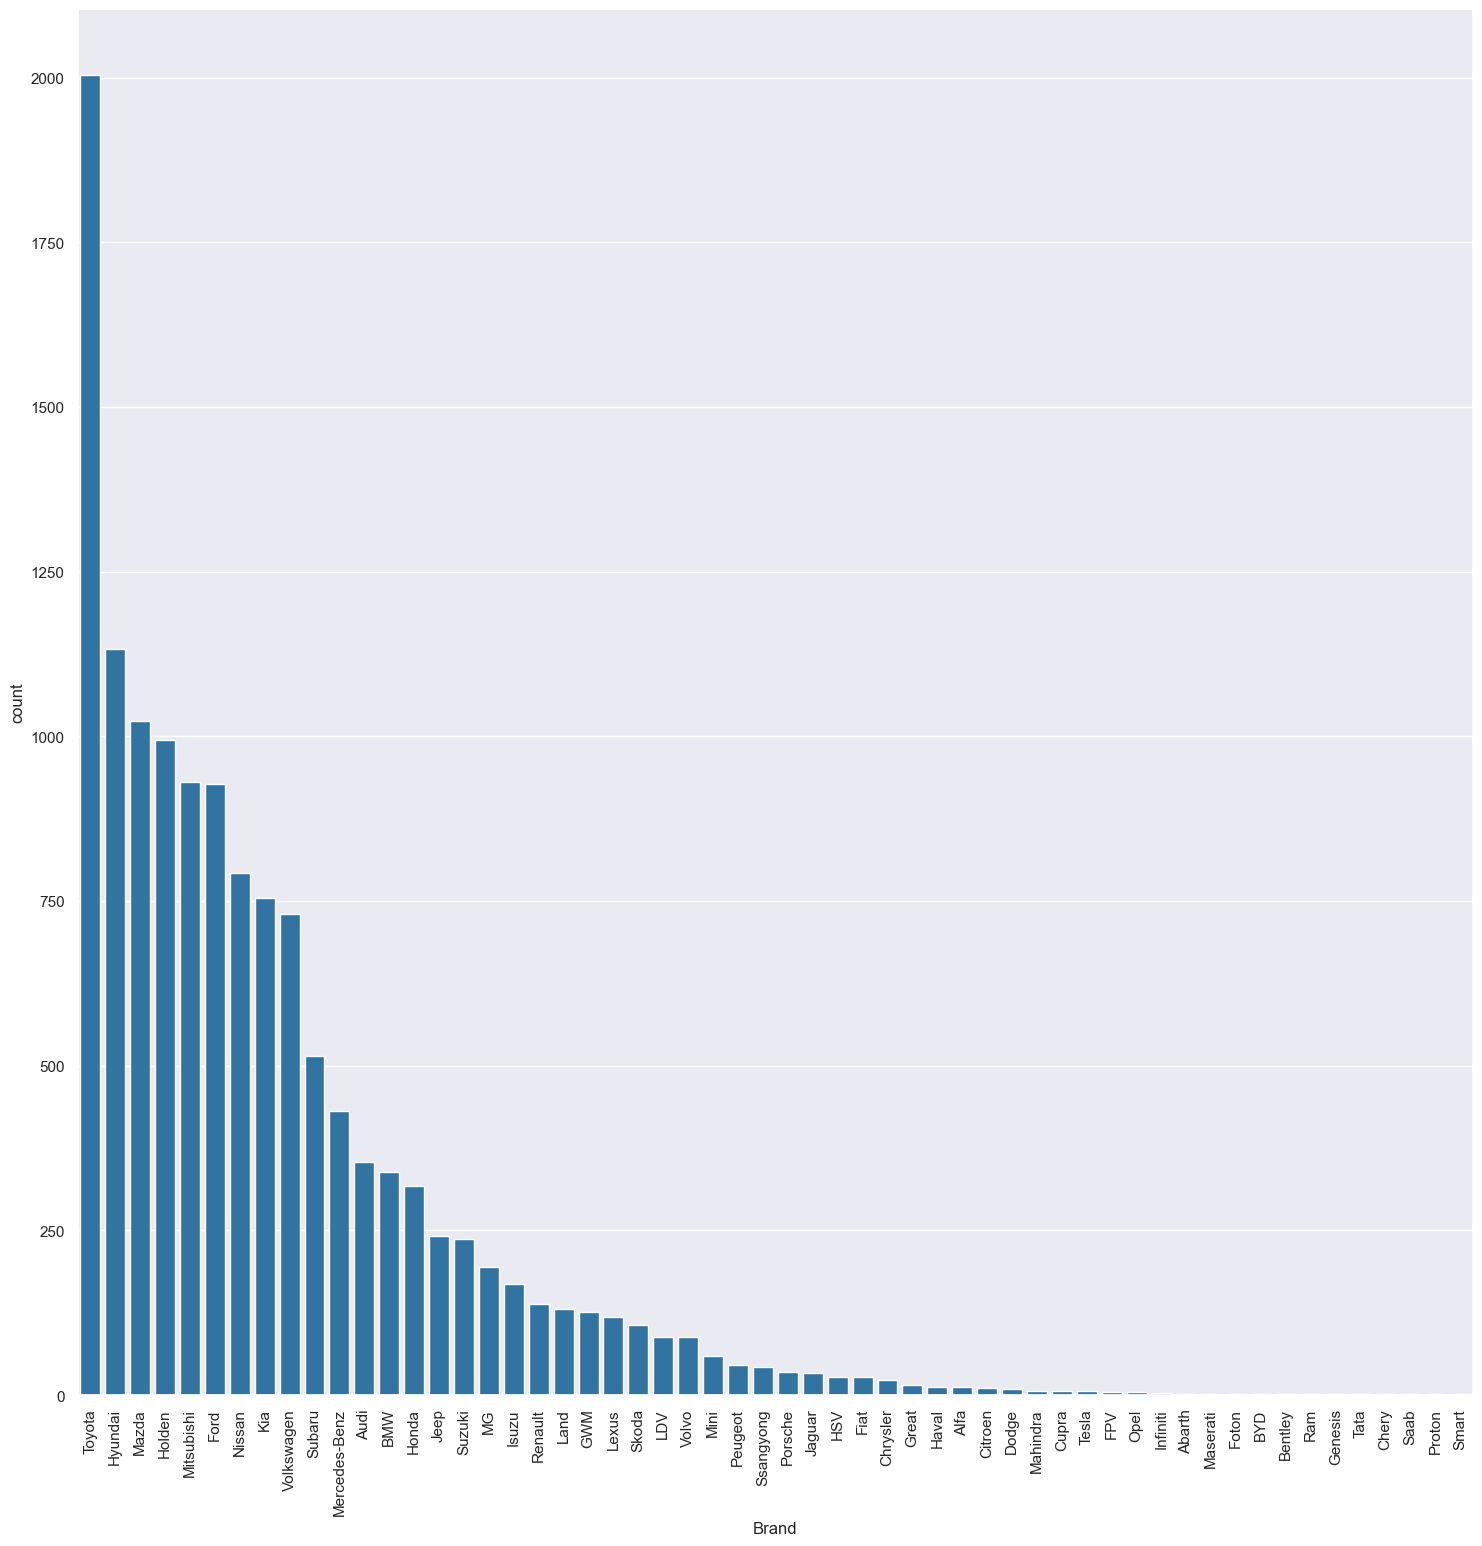

In [58]:
# Toyotas are the most prevailing brand by a wide margin in the Australian car market, followed by Hyundai and Mazda.

plt.figure(figsize= (18,18))

sns.countplot(x='Brand', data=df2, color='#1f77b4', order = df2['Brand'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

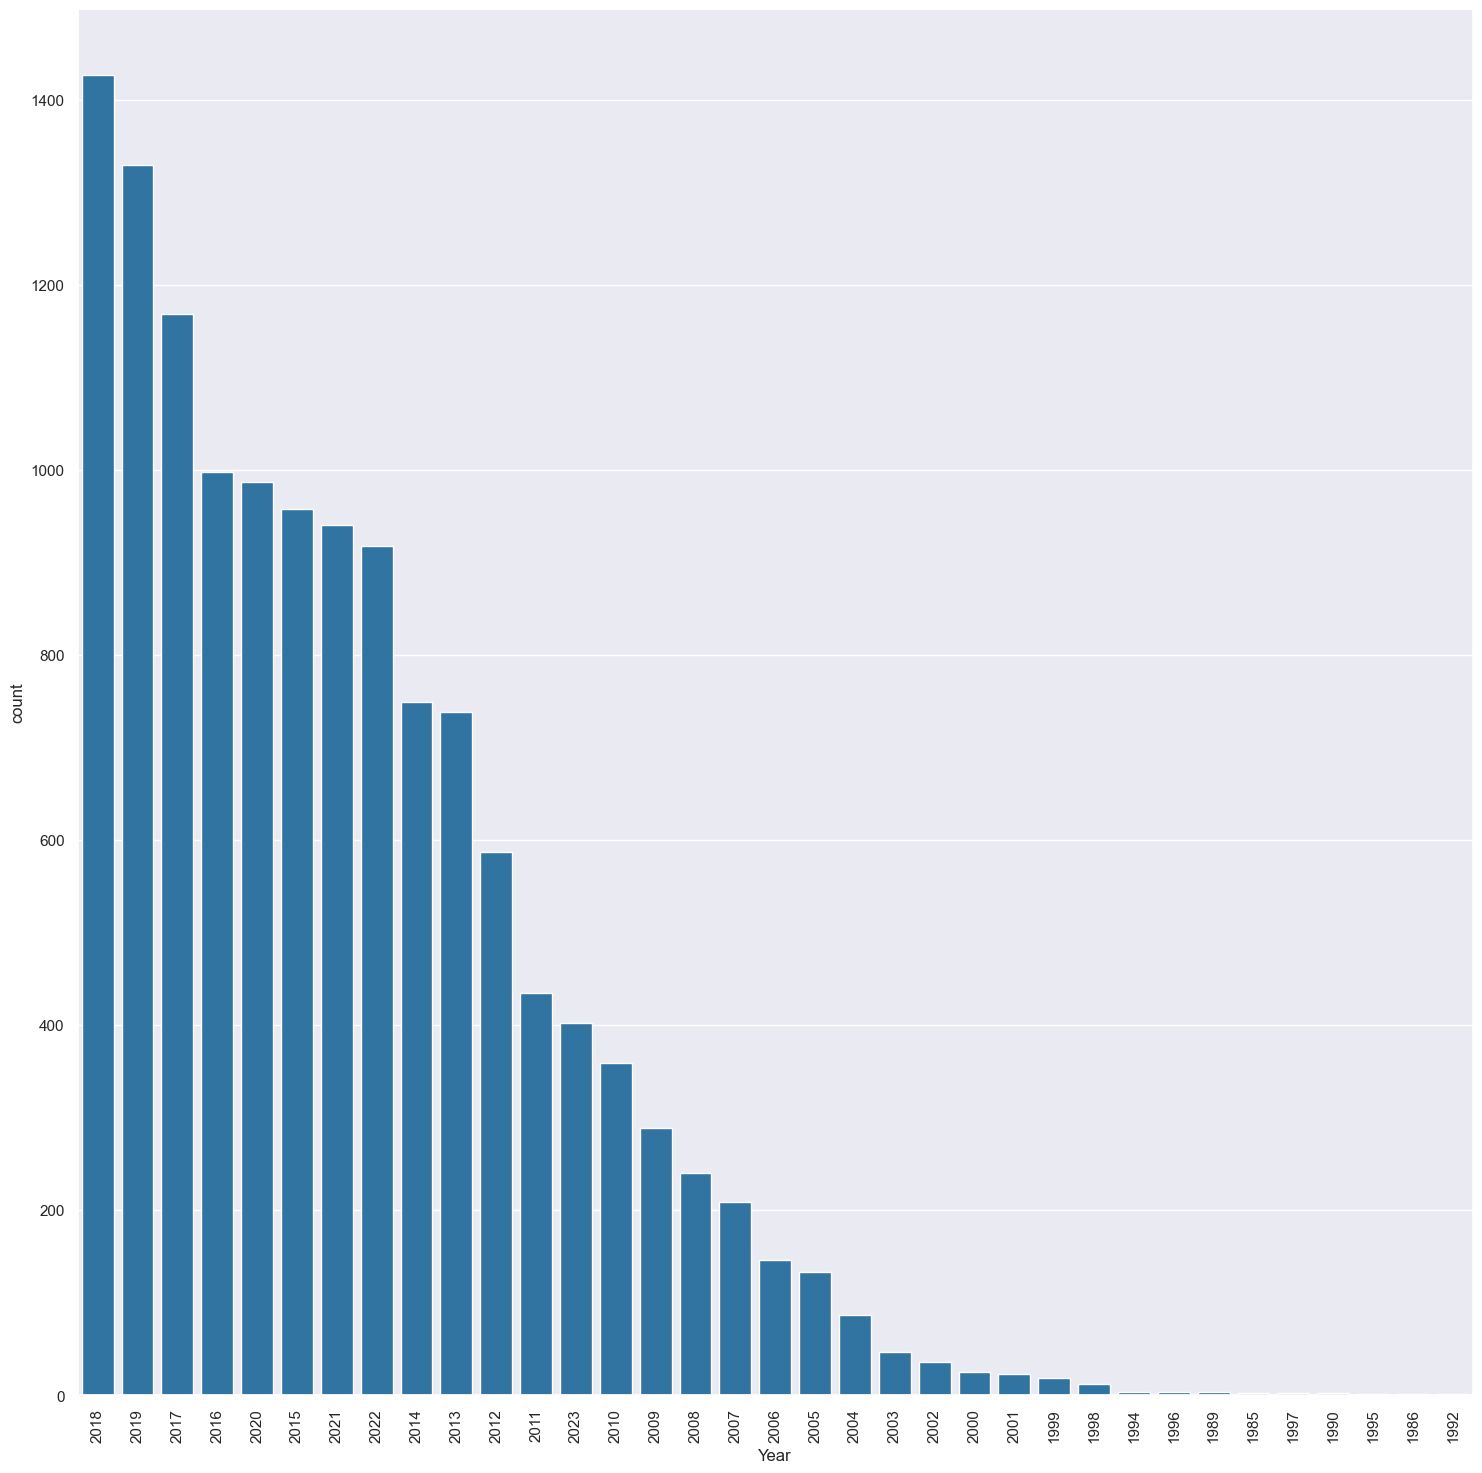

In [59]:
# 2018, 2019, 2017 year cars are most present in the Australian car market.

plt.figure(figsize= (18,18))

sns.countplot(x ='Year', data=df2, color='#1f77b4', order = df2['Year'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

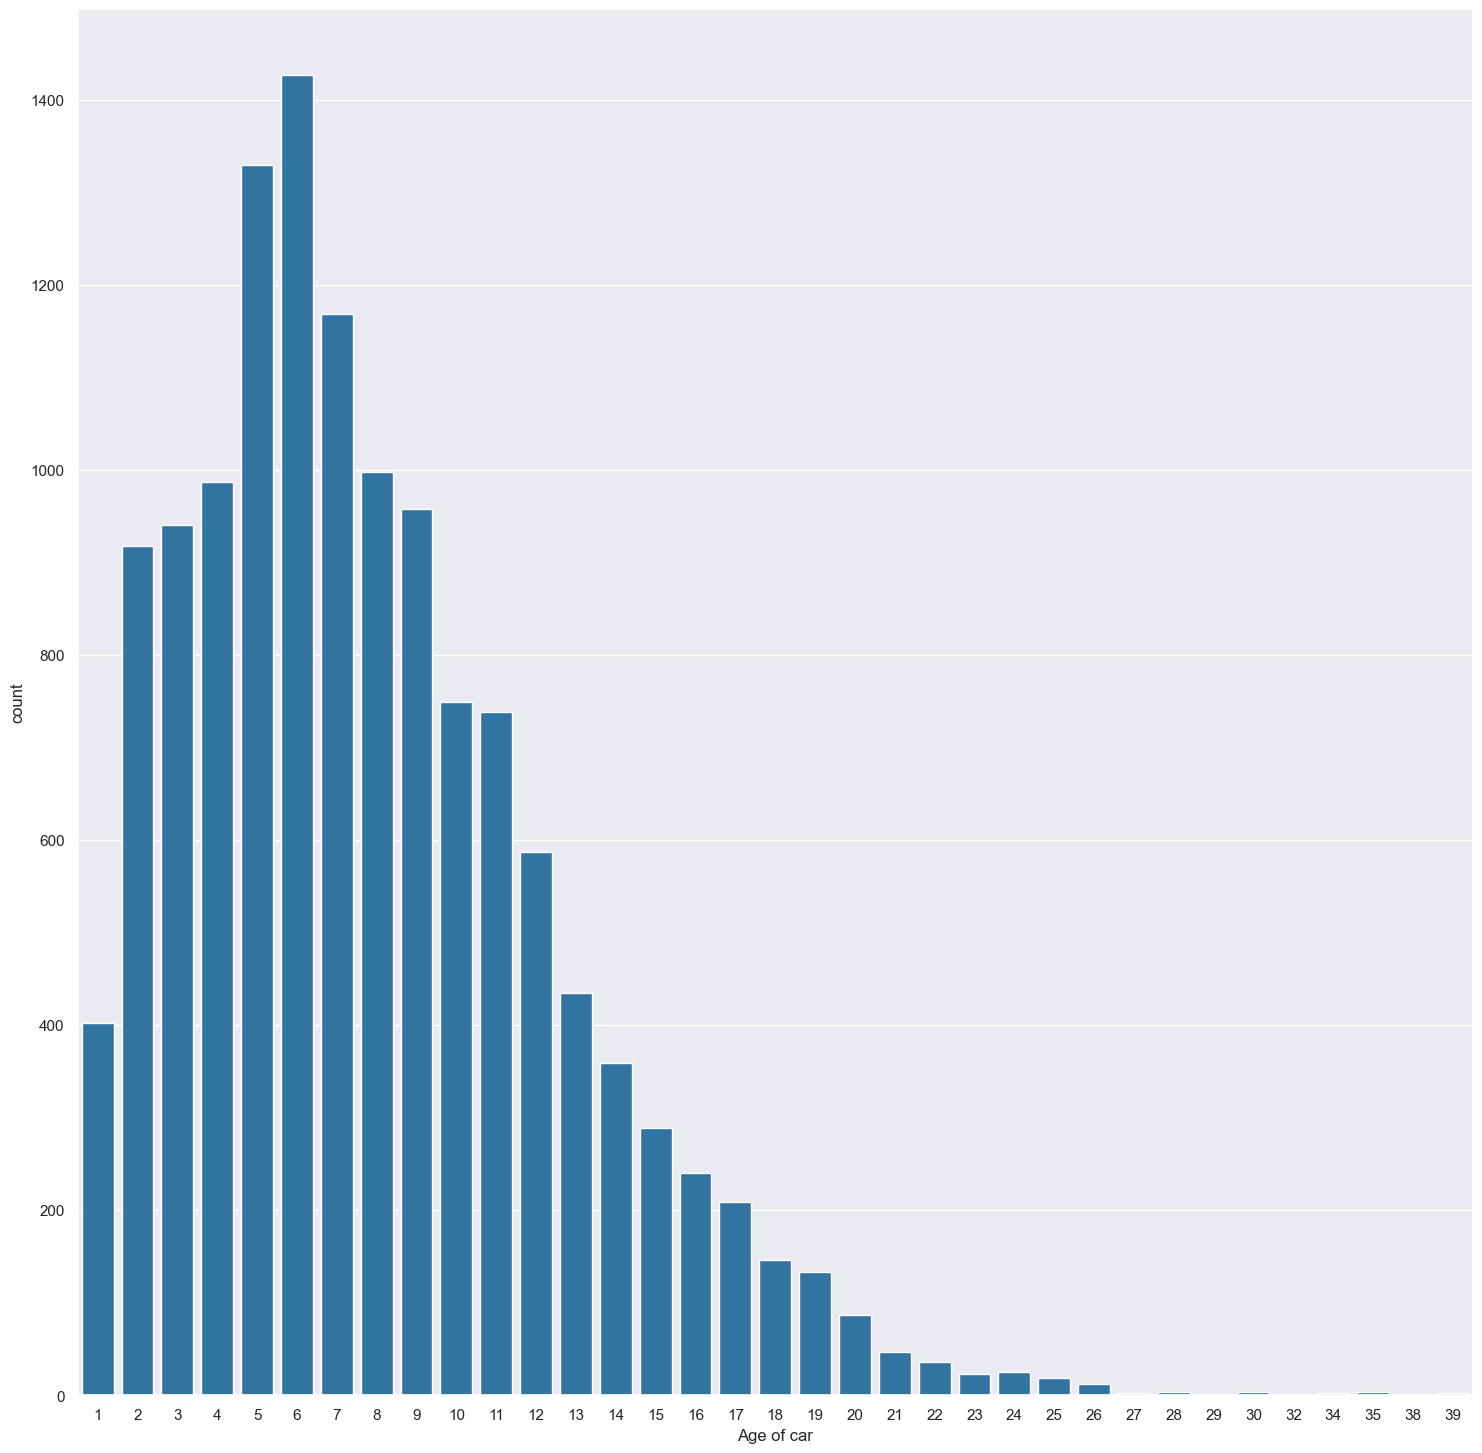

In [60]:
# Distribution of the age of cars in the market

# We can infer that USED cars are predominant in the market.

plt.figure(figsize= (18,18))

sns.countplot(x ='Car_Age', data=df2, color='#1f77b4')

plt.xlabel('Age of car')
plt.show()

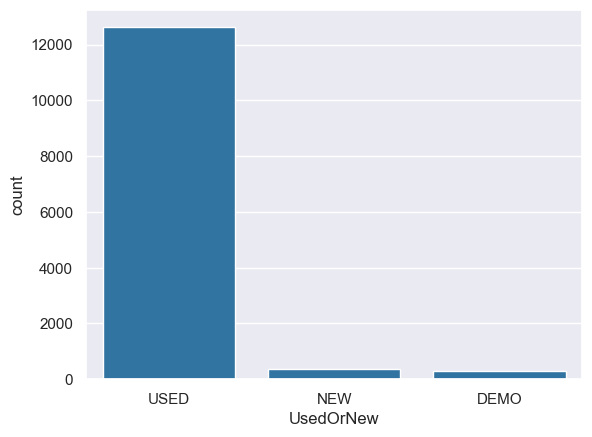

In [61]:
# As expected, USED cars take up most of the shares in the Australian car market

sns.countplot(x ='UsedOrNew', data=df2, color='#1f77b4', order = df2['UsedOrNew'].value_counts().index)

plt.show()

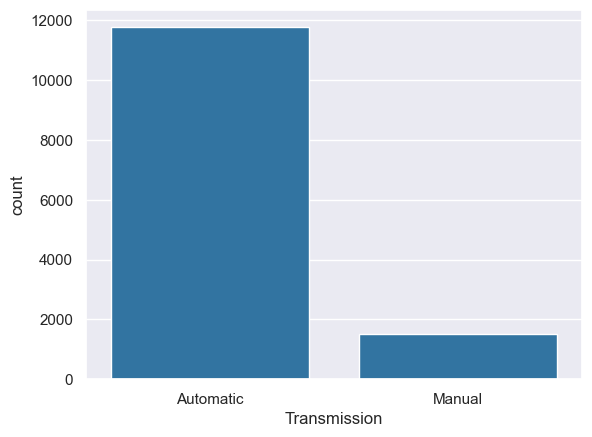

In [62]:
# Automatic transmission vehicles are predominant in Australian car market.  

sns.countplot(x ='Transmission', data=df2, color='#1f77b4', order = df2['Transmission'].value_counts().index)

plt.show()

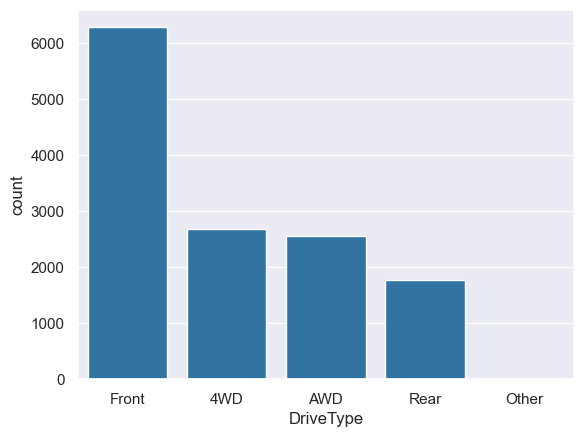

In [63]:
# Vehicles that are FWD are predominant in Australian vehicle market.

sns.countplot(x ='DriveType', data=df2, color='#1f77b4', order = df2['DriveType'].value_counts().index)

plt.show()

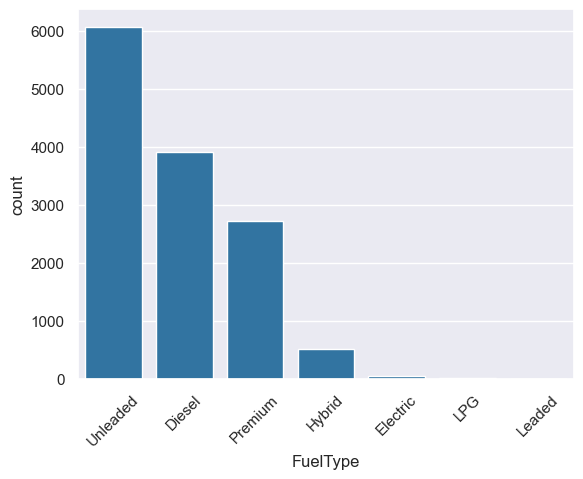

In [64]:
# vehicles with unleaded and diesel fuel types are predominant in the Australian car market.
# EV has a very small market share in the Australian car market.

sns.countplot(x ='FuelType', data=df2, color='#1f77b4', order = df2['FuelType'].value_counts().index)

plt.xticks(rotation = 45)
plt.show()

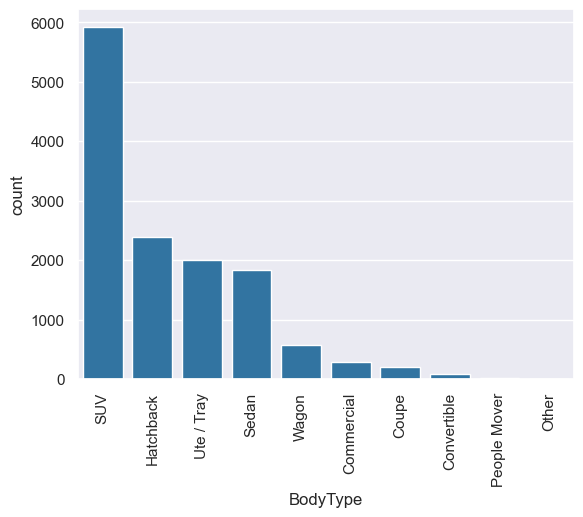

In [65]:
# SUV dominates the Australian car market, followed by Hatchback

sns.countplot(x ='BodyType', data=df2, color='#1f77b4', order = df2['BodyType'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

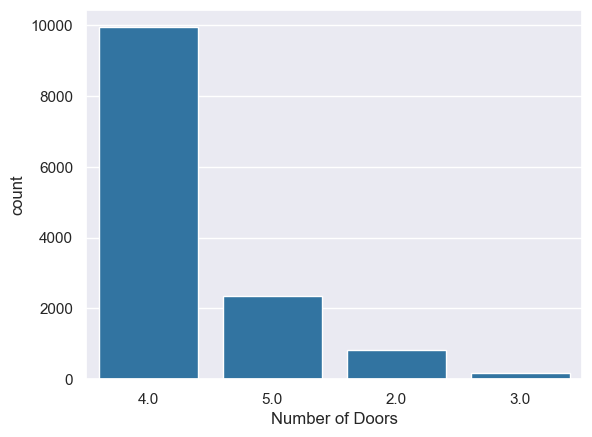

In [66]:
# 4 Door vehicles dominate the Australian car market

sns.countplot(x='Doors', data=df2, color='#1f77b4', order = df2['Doors'].value_counts().index)

plt.xlabel('Number of Doors')
plt.show()

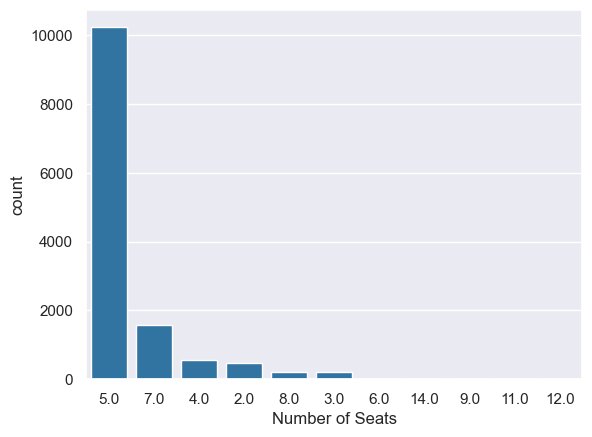

In [67]:
# 5-seat cars dominate the Australian vehicle market

sns.countplot(x ='Seats', data=df2, color='#1f77b4', order = df2['Seats'].value_counts().index)

plt.xlabel('Number of Seats')
plt.show()

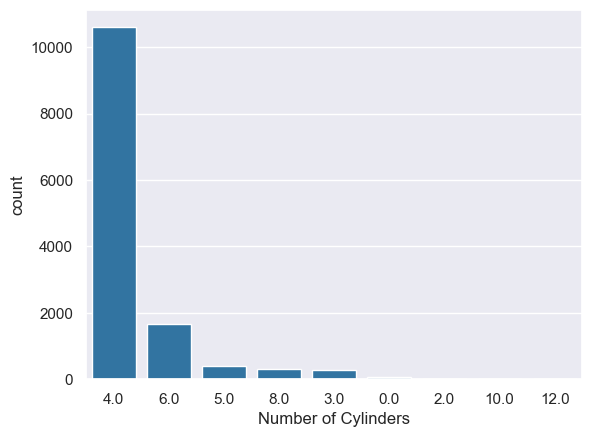

In [68]:
# Vehicles with 4 cylinders are predominant in Australian car market.

sns.countplot(x ='CylindersinEngine', data=df2, color='#1f77b4', order = df2['CylindersinEngine'].value_counts().index)

plt.xlabel('Number of Cylinders')
plt.show()

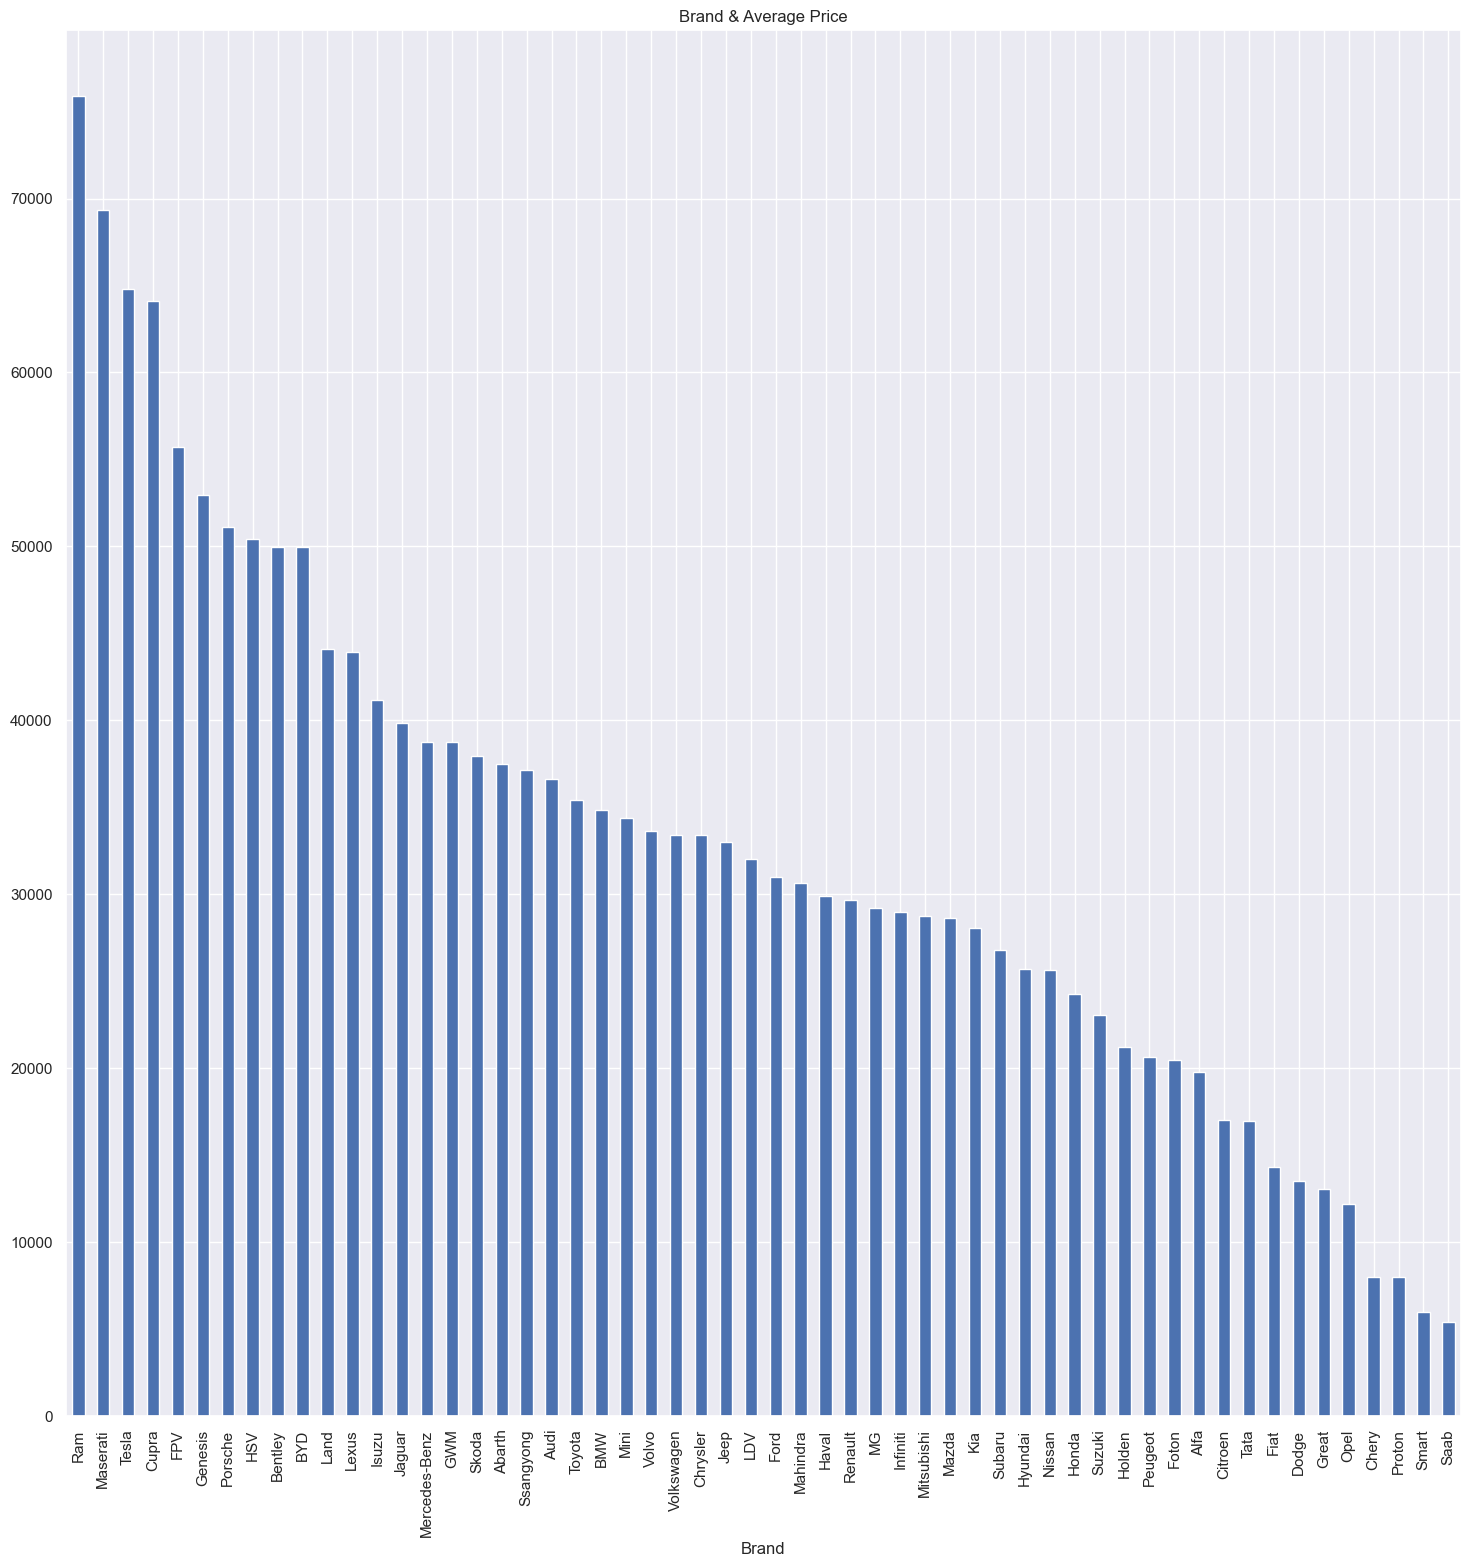

In [69]:
# Ram, Maserati, Cupra, Tesla, and FPV are top 5 brands with highest average prices.

plt.figure(figsize= (18,18))

df2.groupby('Brand')['Price'].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation = 90)
plt.xlabel('Brand')
plt.title('Brand & Average Price')
plt.show()

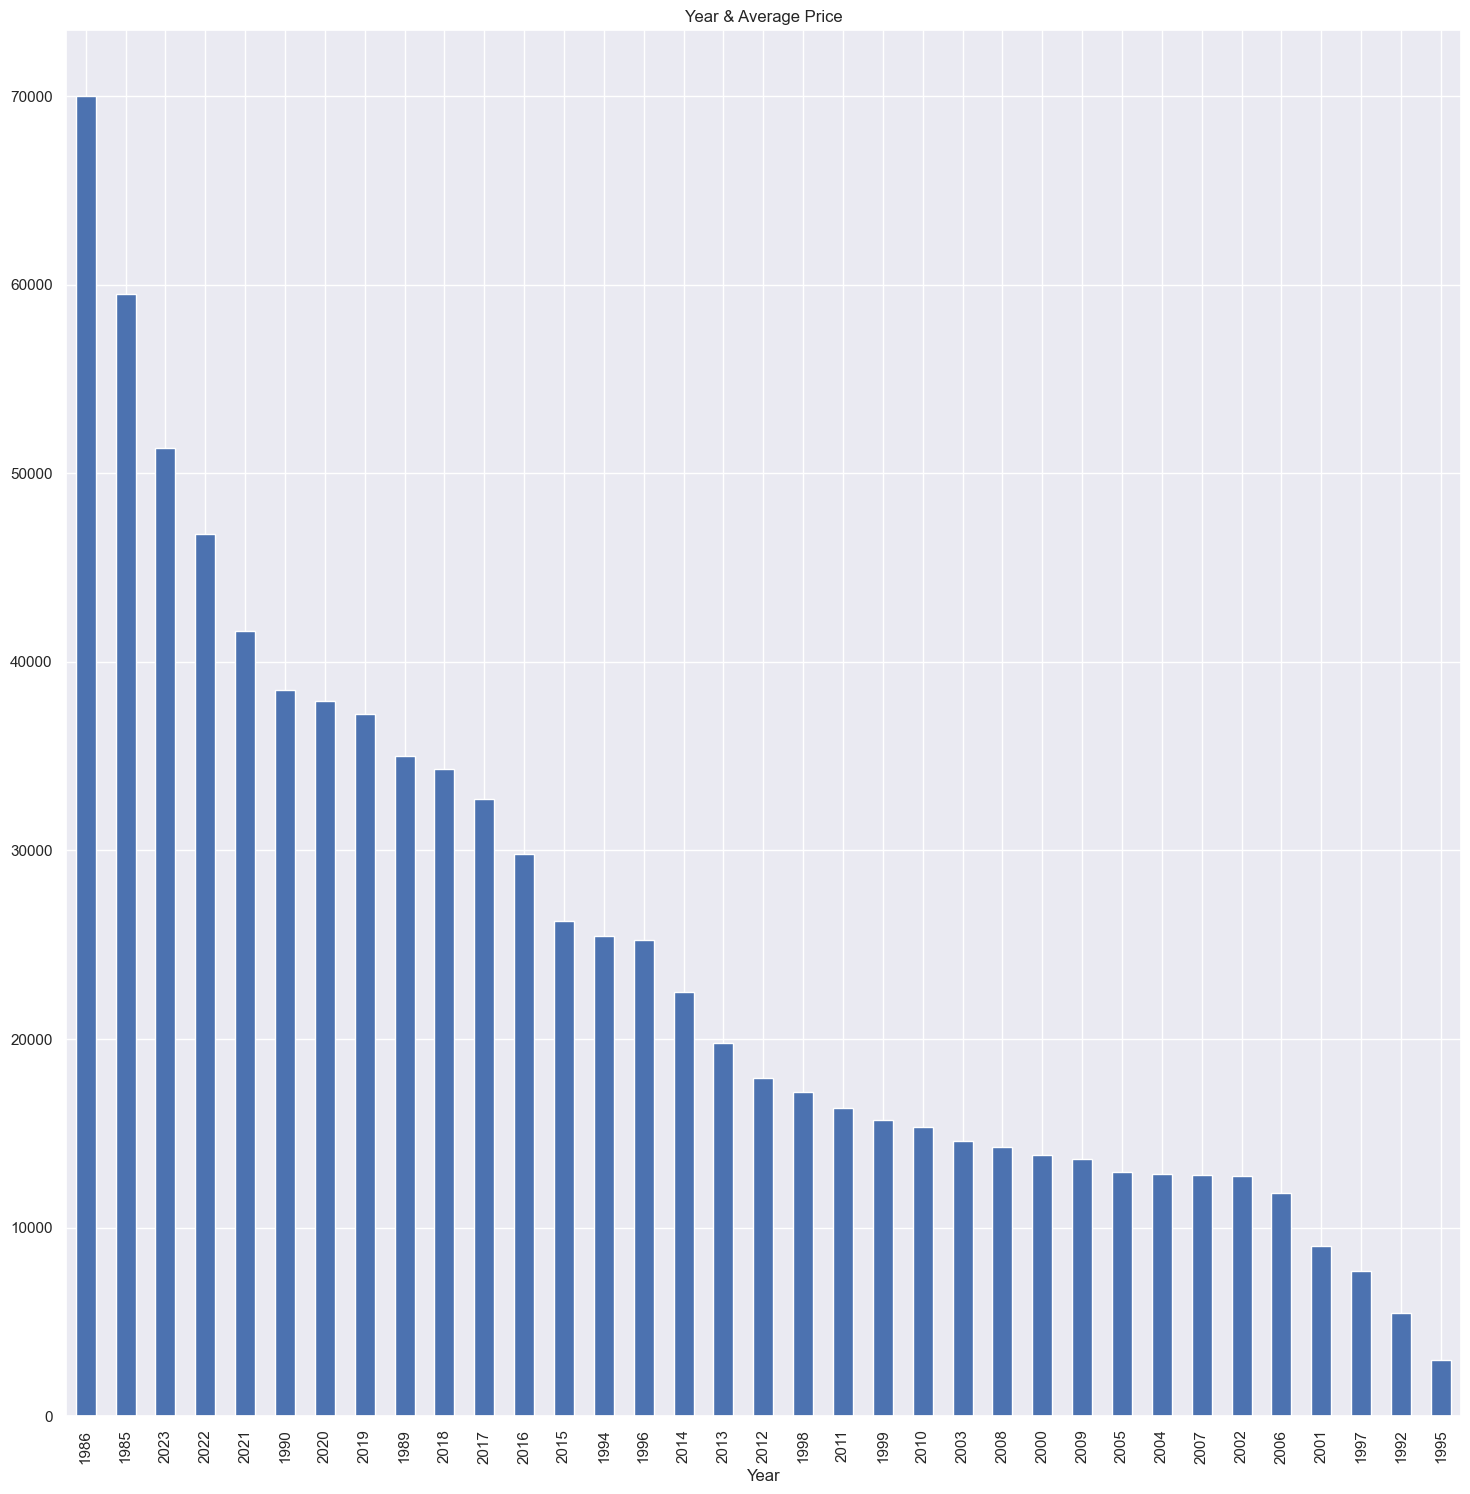

In [70]:
# Vintage cars have higher average prices. 

plt.figure(figsize= (18,18))

df2.groupby('Year')['Price'].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.title('Year & Average Price')
plt.show()

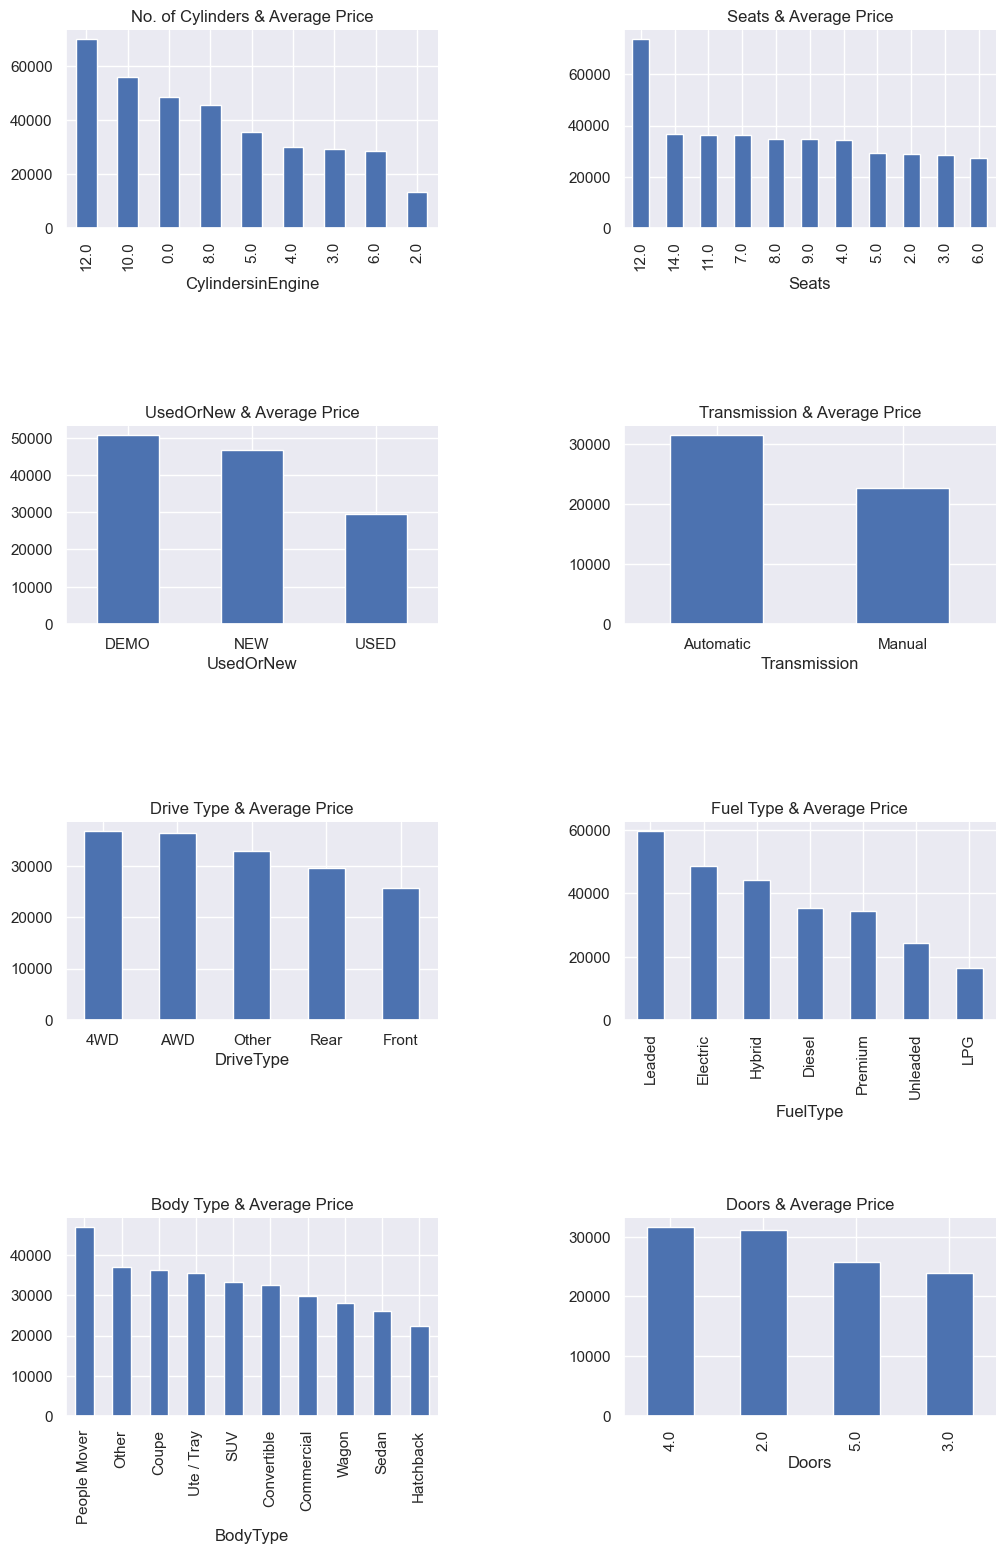

In [71]:
# Findings:

# 1) 12 cylinders in engine have highest average price. With some exceptions, higher cylinders equate to higher average prices.
# 2) Aside from average price of 12-seated vehicles being high, price between vehicles with different no. of seats
#    does not vary much.
# 3) Automatic transmission vehicles have higher average price than manual transmission vehicles
# 4) As expected, new vehicles have higher average prices than used vehicles
# 5) 4WD and AWD vehicles have higher average prices 
# 6) Leaded, Electric, and Hybrid vehicles demand higher average price.

fig, axe = plt.subplots(4,2, figsize=(12,18))

df2.groupby('CylindersinEngine')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[0][0])
axe[0][0].tick_params(axis='x', labelrotation=90)
axe[0][0].set_title('No. of Cylinders & Average Price')

df2.groupby('Seats')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[0][1])
axe[0][1].tick_params(axis='x', labelrotation=90)
axe[0][1].set_title('Seats & Average Price')

df2.groupby('UsedOrNew')['Price'].mean().plot.bar(ax=axe[1][0])
axe[1][0].tick_params(axis='x', labelrotation=0)
axe[1][0].set_title('UsedOrNew & Average Price')

df2.groupby('Transmission')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[1][1])
axe[1][1].tick_params(axis='x', labelrotation=0)
axe[1][1].set_title('Transmission & Average Price')

df2.groupby('DriveType')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[2][0])
axe[2][0].tick_params(axis='x', labelrotation=0)
axe[2][0].set_title('Drive Type & Average Price')

df2.groupby('FuelType')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[2][1])
axe[2][1].tick_params(axis='x', labelrotation=90)
axe[2][1].set_title('Fuel Type & Average Price')

df2.groupby('BodyType')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[3][0])
axe[3][0].tick_params(axis='x', labelrotation=90)
axe[3][0].set_title('Body Type & Average Price')

df2.groupby('Doors')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[3][1])
axe[3][1].tick_params(axis='x', labelrotation=90)
axe[3][1].set_title('Doors & Average Price')

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [9]:
plt.figure(figsize= (18,18))

df2.groupby('FuelConsumption')['Price'].mean().sort_values(ascending=False).plot.bar()

plt.title('Average Price by Fuel Consumption')

plt.show()

NameError: name 'plt' is not defined

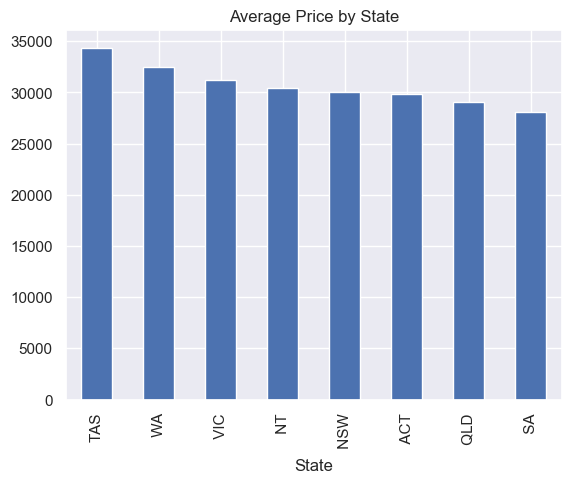

In [73]:
df2.groupby('State')['Price'].mean().sort_values(ascending=False).plot.bar()

plt.title('Average Price by State')
plt.show()

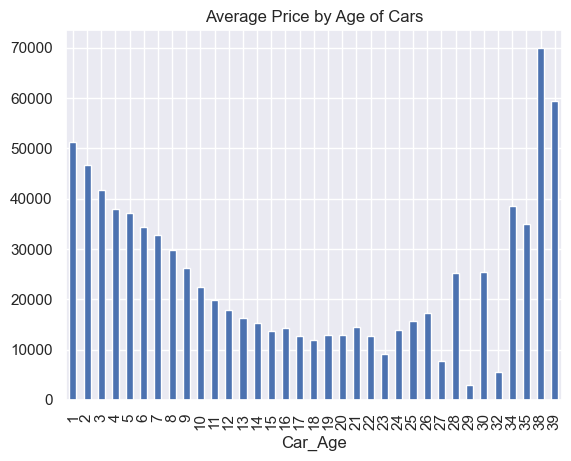

In [74]:
# We can observe that the average price of cars decline and hits trough at around 19 and then trends upward (Vintage cars)

df2.groupby('Car_Age')['Price'].mean().plot.bar()

plt.title('Average Price by Age of Cars')
plt.xticks(rotation = 90)
plt.show()

# 4. Price distribution by different car features

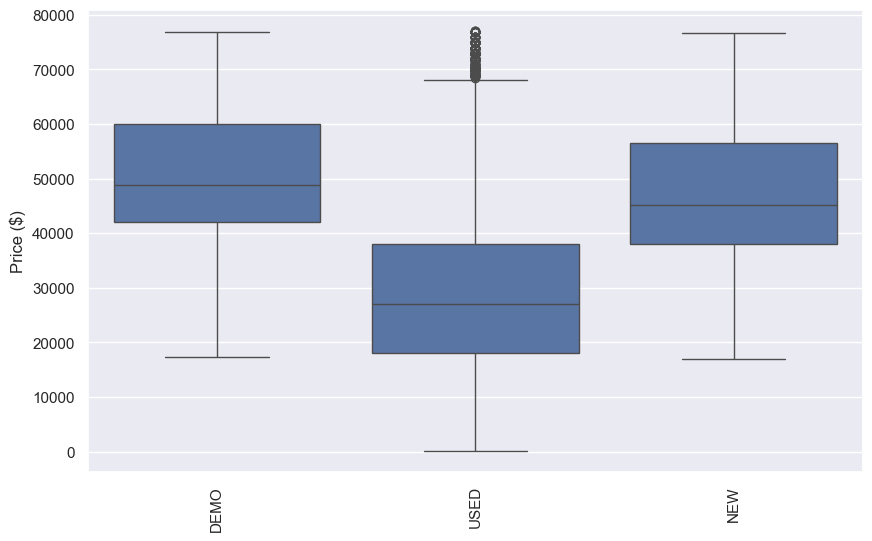

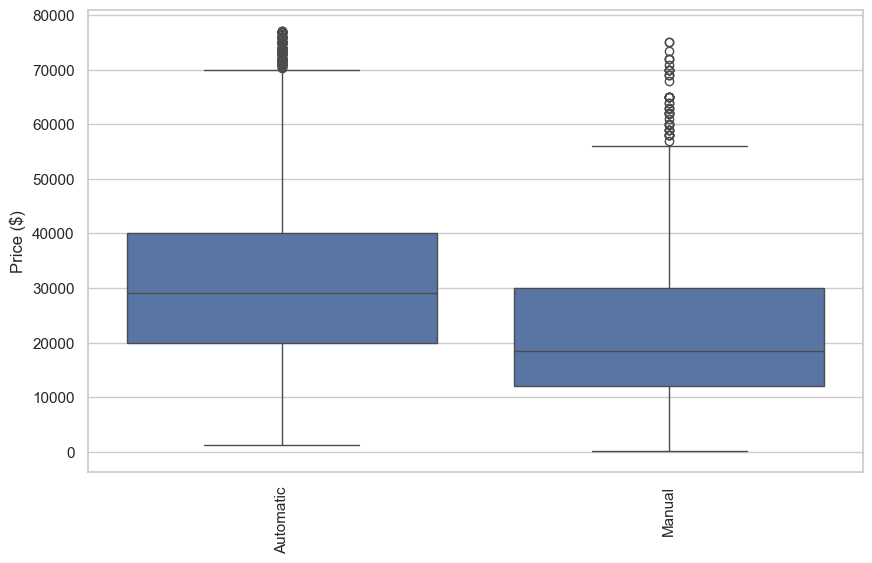

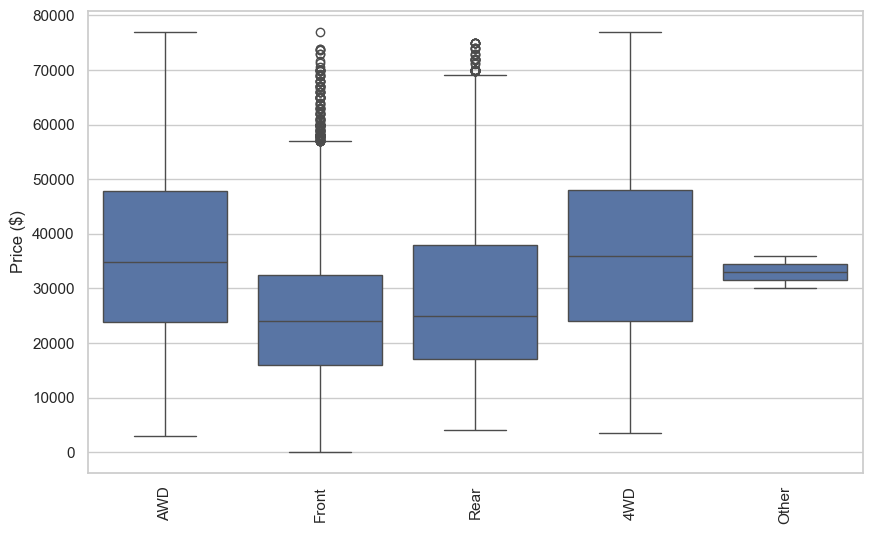

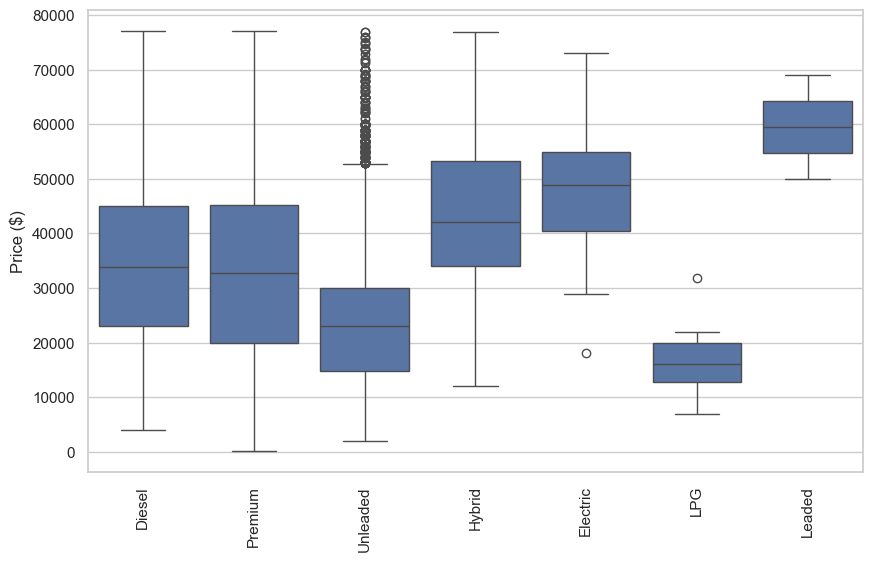

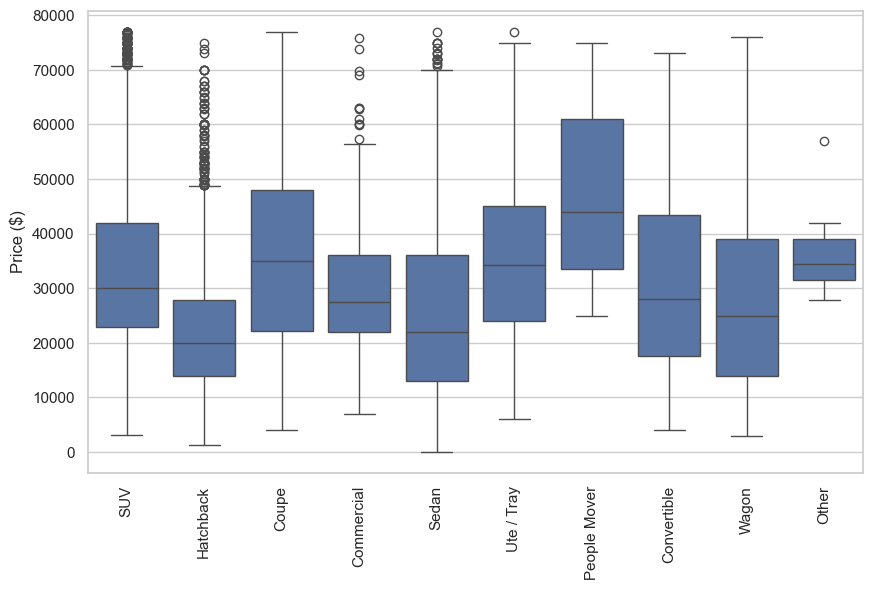

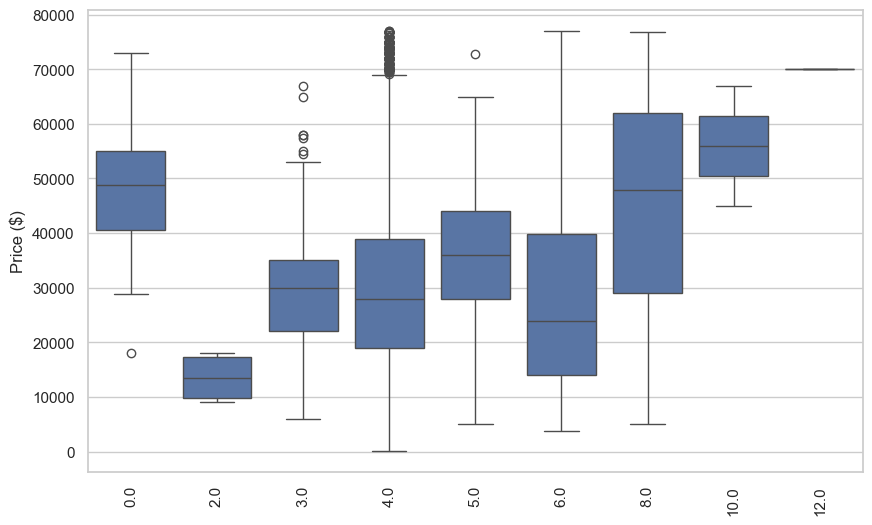

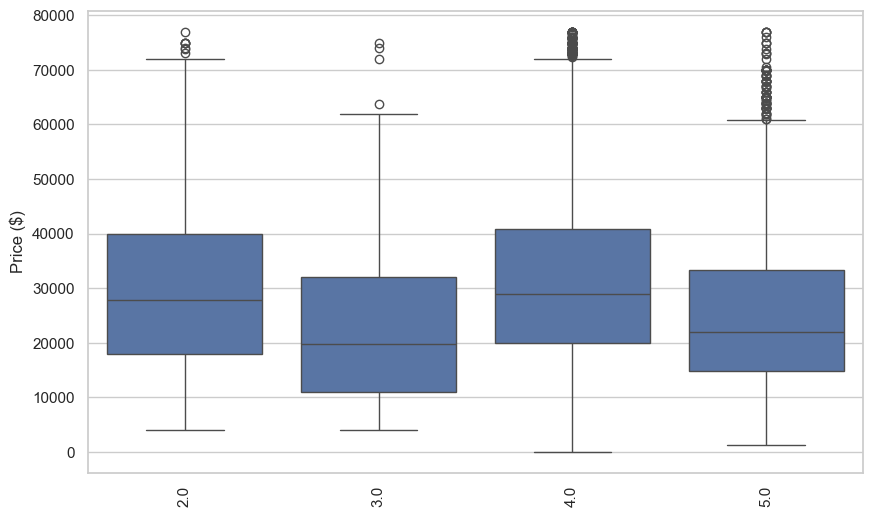

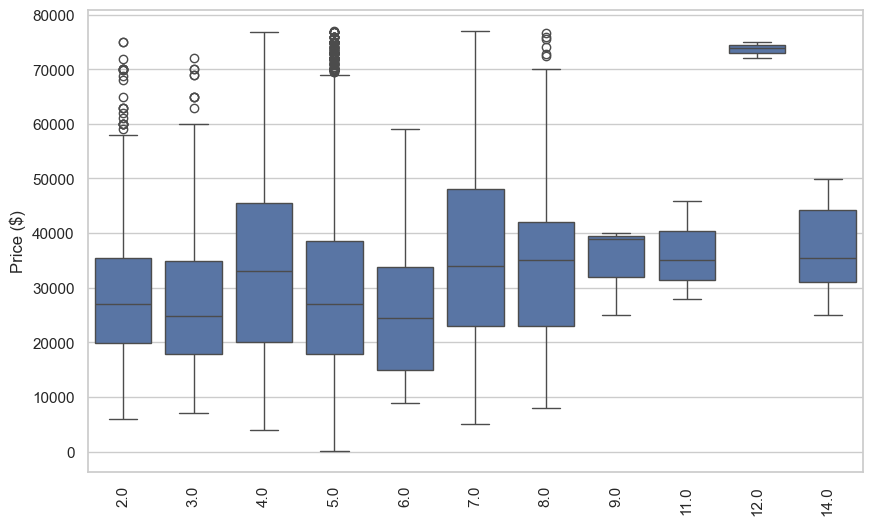

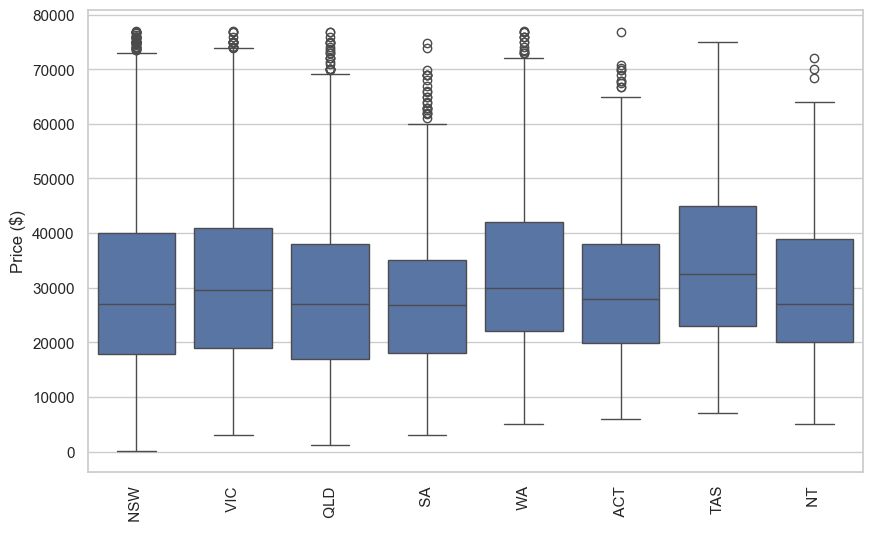

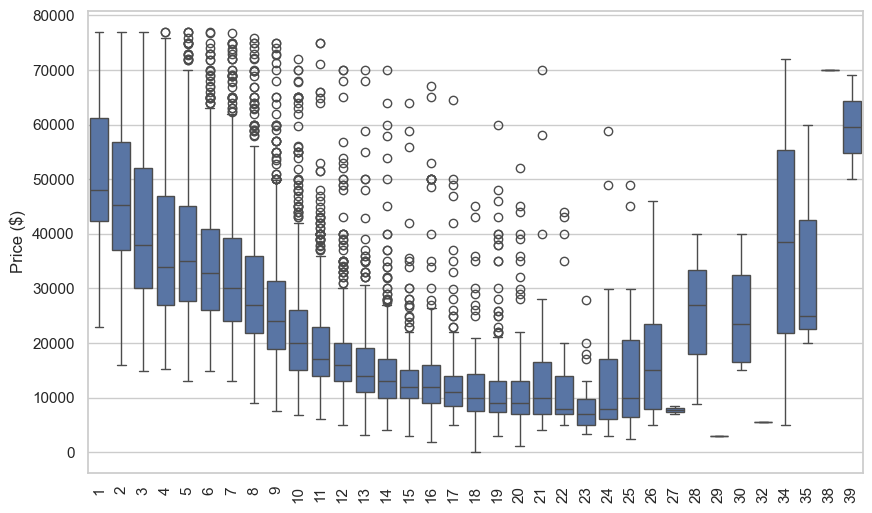

In [75]:
cols = ['UsedOrNew','Transmission','DriveType','FuelType','BodyType','CylindersinEngine','Doors','Seats','State','Car_Age']

for col in cols:
    plt.subplots(figsize=(10,6))
    sns.boxplot(x=df2[col], y=df2['Price'])
    plt.ylabel('Price ($)')
    plt.xlabel('')
    plt.xticks(rotation=90)
    sns.set(style='whitegrid')
    plt.show()

# 5. Data Encoding

In [76]:
df3 = df2

In [77]:
df3 = df3.drop(['Brand','Year','Model'], axis=1)

In [78]:
df3 = pd.get_dummies(df3)

In [79]:
print("The shape of the encoded dataset: ", df3.shape)

The shape of the encoded dataset:  (13284, 42)


# 6. Data Splitting

In [80]:
y = df3['Price']
X = df3.drop(['Price'], axis =1)

y.shape, X.shape

((13284,), (13284, 41))

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

ModuleNotFoundError: No module named 'sklearn'

# 7. Model Building (Linear Regression and Random Forest)

## Linear Regression

### Training the model

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


ModuleNotFoundError: No module named 'sklearn'

### Applying the model to make a prediction

In [ ]:
y_lr_train_pred = lr.predict(X_train)

y_lr_test_pred = lr.predict(X_test)

### Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

lr_results

## Random Forest

### Training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

### Applying the model to make a prediction

In [ ]:
y_rf_train_pred = rf.predict(X_train)

y_rf_test_pred = rf.predict(X_test)

### Evaluate Model Performance

In [ ]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest Regression', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

rf_results

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis =0)

df_models

In [ ]:
df_models.reset_index(drop=True)

# Data visualization of prediction results

## Linear Regression

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_train, y=y_lr_train_pred, c='#7CAE00', alpha=0.3)

z= np.polyfit(y_train, y_lr_train_pred, 1)
p= np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Price')
plt.xlabel('Experimental Price')

## Random Forest

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_train, y=y_rf_train_pred, c='#7CAE00', alpha=0.3)

z= np.polyfit(y_train, y_rf_train_pred, 1)
p= np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Price')
plt.xlabel('Experimental Price')